In [39]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA   #Import the PCA function from sklearn
from sklearn import preprocessing       #Gives us function for scaling the data before performing PCA
from sklearn.preprocessing import StandardScaler

In [6]:
def Plot_all(label_1,label_2):
    for i in range(1,11):
        for j in range(i+1,11):
            plt.scatter(label_1[:,i],label_1[:,j],color = 'red',alpha = 0.5)
            plt.scatter(label_2[:,i],label_2[:,j],color = 'blue',alpha = 0.5)
            plt.xlabel('Plot ' + str(i))
            plt.ylabel('Plot ' + str(j))
            title = 'Plot of '+str(i)+' vs '+ str(j)
            plt.title (title)
            plt.show()
            plt.clf()

In [25]:
data = np.loadtxt("data.txt", delimiter = "\t", skiprows = 1)  #Load the data onto numpy array
df_data = pd.DataFrame(data)
df_data = df_data[[1,2,3,4,5,6,7,8,9,10]]

In [8]:
label_1 = data[data[:,0]==1]
df_1 = pd.DataFrame(label_1)
#df_1 = df_1[[1,2,3,4,5,6,7,8,9,10]]

In [9]:
label_2 = data[data[:,0]==2]
df_2 = pd.DataFrame(label_2)
#df_2 = df_2[[1,2,3,4,5,6,7,8,9,10]]

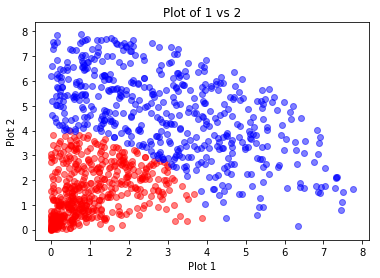

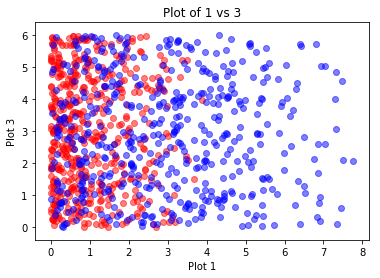

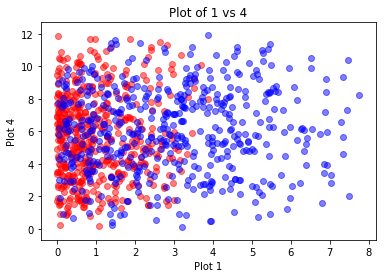

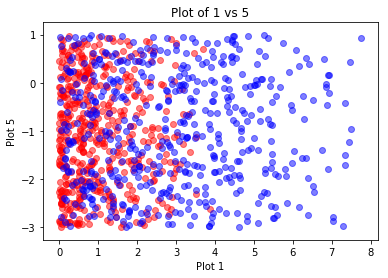

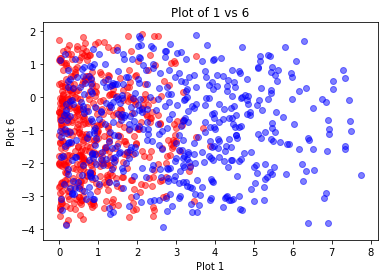

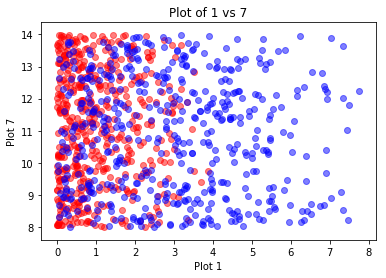

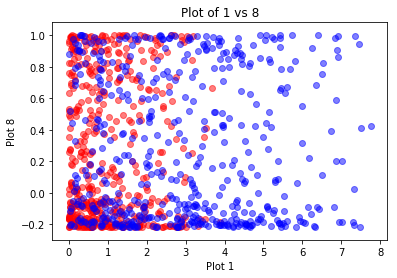

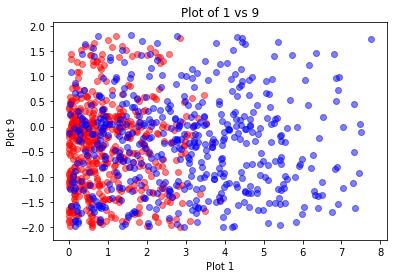

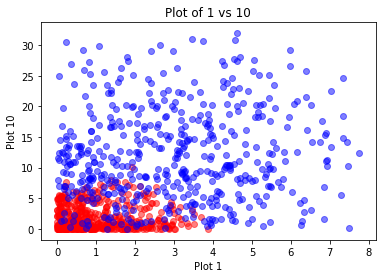

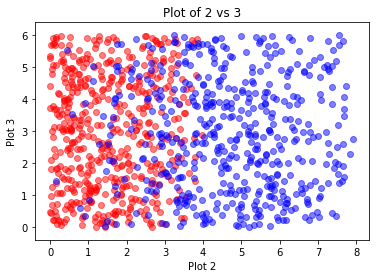

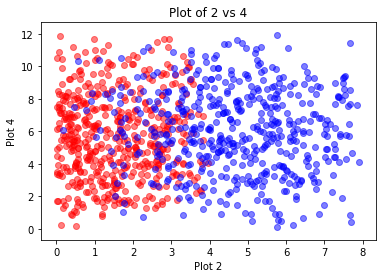

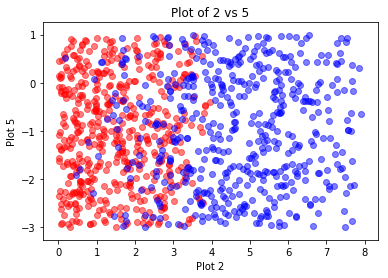

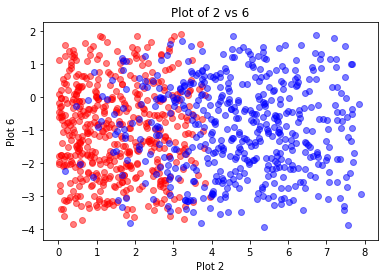

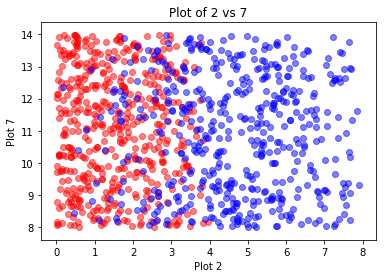

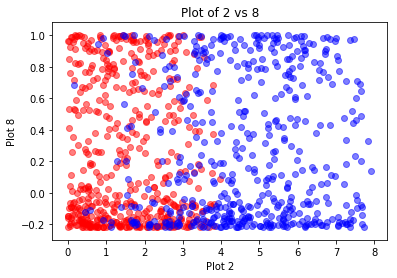

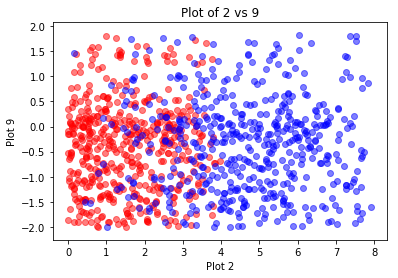

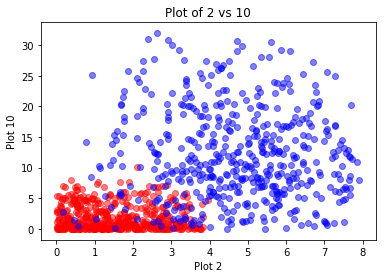

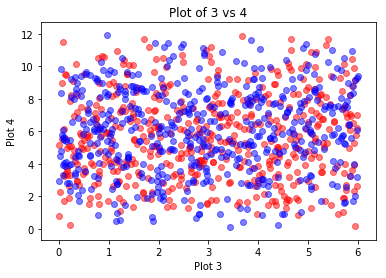

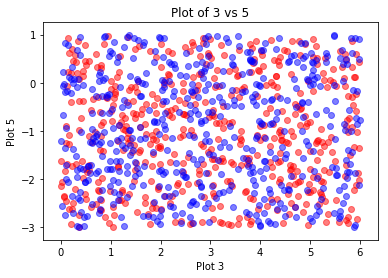

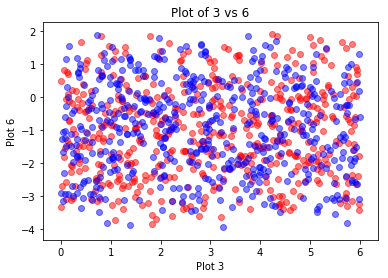

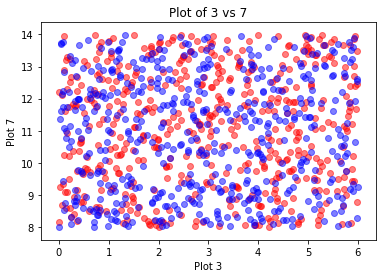

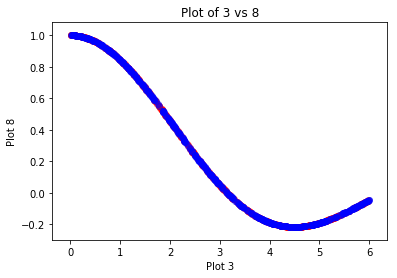

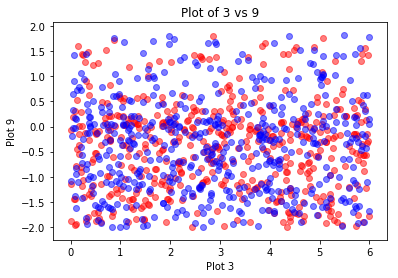

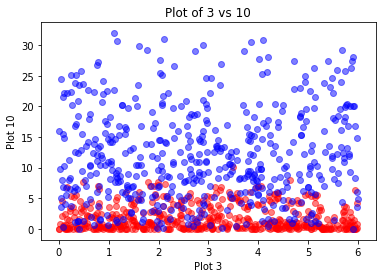

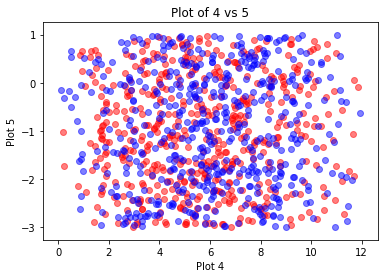

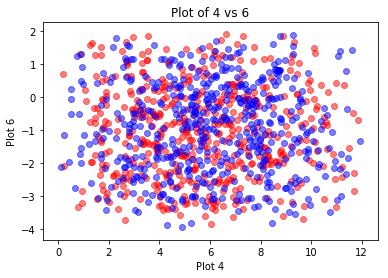

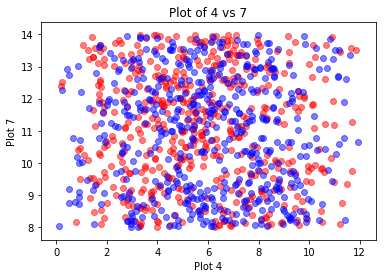

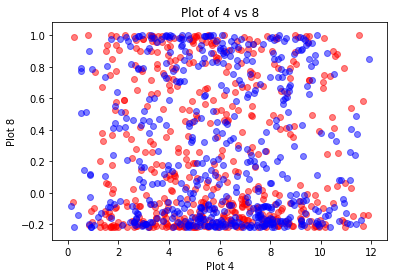

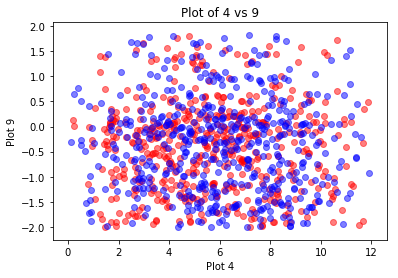

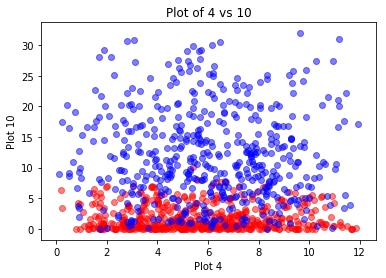

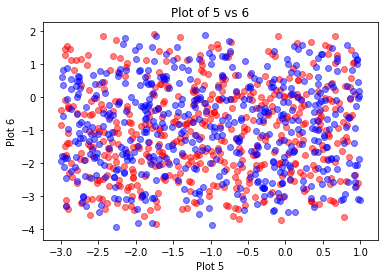

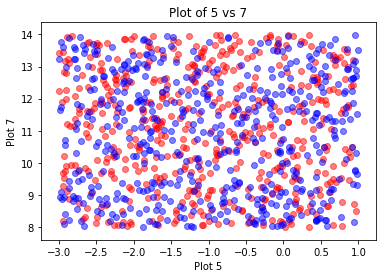

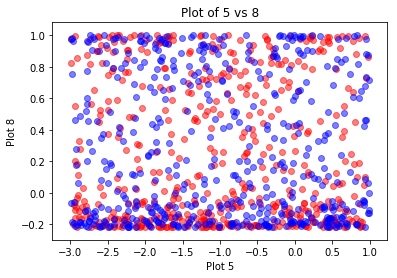

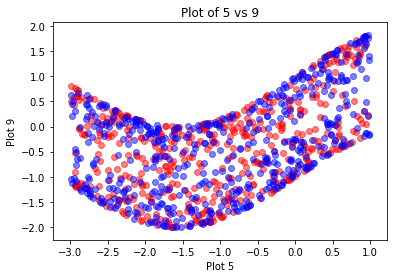

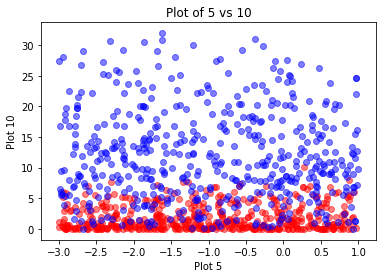

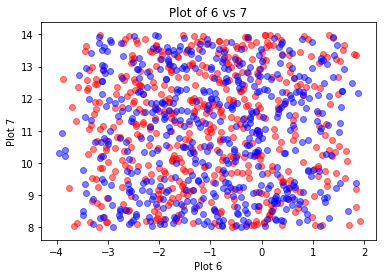

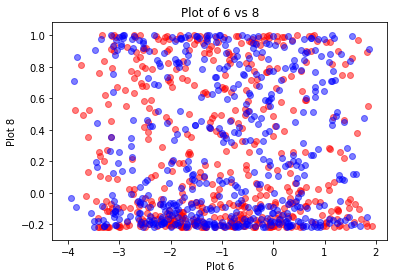

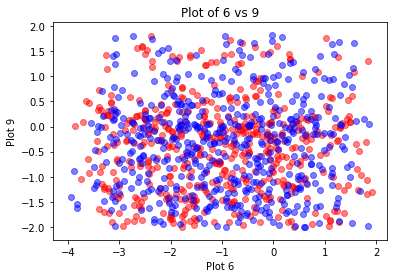

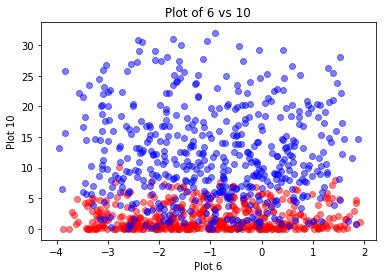

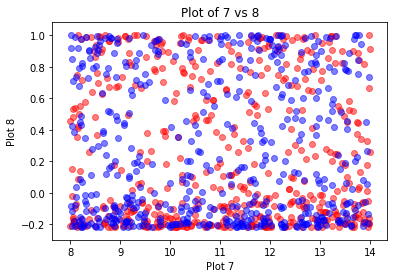

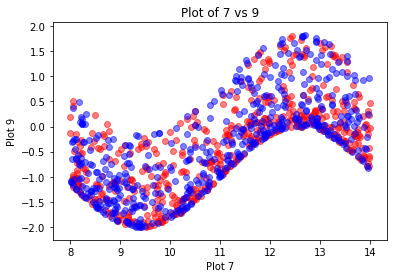

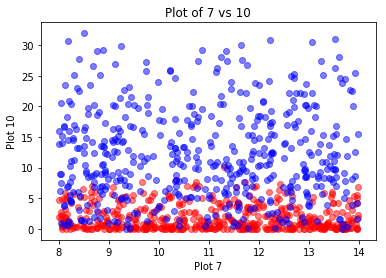

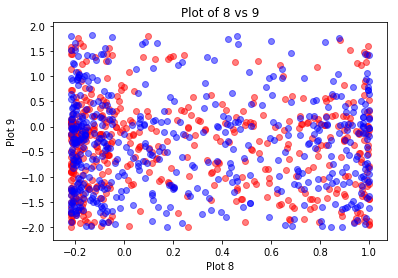

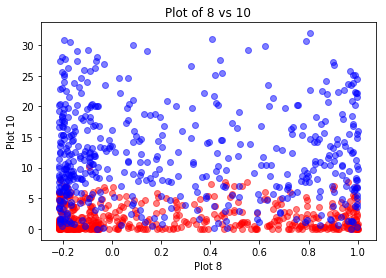

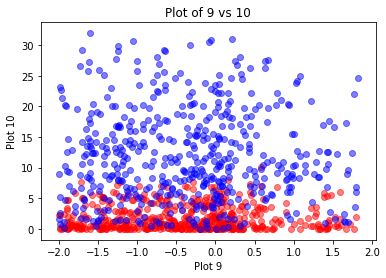

<Figure size 432x288 with 0 Axes>

In [51]:
Plot_all(label_1,label_2)

Before doing PCA we have to center and scale the data

Also we pass the transpose of the data (data.T) because the 'scale()' function wants it that way.

In [47]:
scaled_data = preprocessing.scale(df_data.T)
pca = PCA()                                   #Create a PCA object
pca.fit(scaled_data)                          #Calculate loading Scores and variation each component accounts for
pca_data = pca.transform(scaled_data)         #Generate coordinates for PCA graph based on loading Scores and scaled data

Now we need to draw a Scree Plot to see how many Principal Components should go into final plot

For that, first Calculate the percentage variation that is caused by each Principal Component (per_var)

In [48]:
per_var = np.round(pca.explained_variance_ratio_*100,decimals=1)  
labels = ['PC' + str(x) for x in range(1,len(per_var)+1)]                #Adding labels

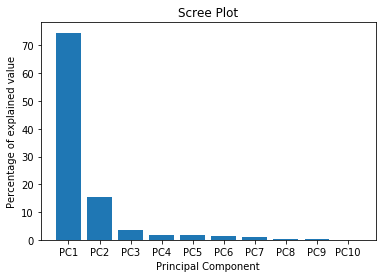

<Figure size 432x288 with 0 Axes>

In [16]:
plt.bar(x= range(1,len(per_var)+1),height = per_var, tick_label = labels)
plt.ylabel('Percentage of explained value')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()
plt.clf()

To draw a PCA plot we will first put the new coordinates[Generated by pca.transform(scaled_data)] into a matrix where rows are the features and columns have PC labels

In [49]:
pca_df = pd.DataFrame(pca_data,index = ['1','2','3','4','5','6','7','8','9','10'], columns = labels)

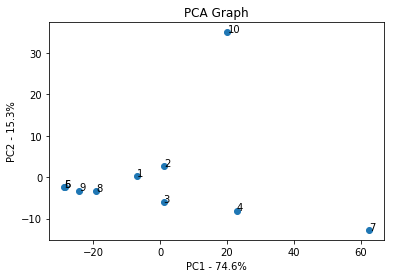

In [50]:
plt.scatter(pca_df.PC1,pca_df.PC2)


plt.title('PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))

for feature in pca_df.index:
    plt.annotate(feature, (pca_df.PC1.loc[feature], pca_df.PC2.loc[feature]))

plt.show()